In [11]:
 import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from ast import literal_eval
import math


'''
con = sqlite3.connect("../Data/site.db")
subjects = pd.read_sql_query('SELECT * from subjects', con)
trial_dat = pd.read_sql_query('SELECT * from trials', con)
# Filter for subjects who complete full experiment
subjects = subjects.loc[subjects.completion == 1]
# How many subjects completed the full experiment?
sub_list = list(subjects.id.unique())
trial_dat = trial_dat.loc[trial_dat.subject_id.isin(sub_list)]

trial_dat = trial_dat[[ 'trial_num', 'jspsychID', 'stimulus', 'time_elapse', 'cause_resp', 'anim_resp', 'cause_rt', 'anim_rt', 'trial_rt', 'subject_id']]
trial_dat.dropna(subset=['subject_id'], inplace=True)
trial_dat.reset_index(drop=True, inplace=True)

## Get trial condition from stimulus filename
trial_dat[['vid_num', 'outcome', 'cf']] = 0
for i in range(len(trial_dat)):
    trial_dat.loc[i, ['vid_num', 'agent', 'outcome', 'cf']] = trial_dat.iloc[i]['stimulus'].split('.')[0].split('_')
trial_dat.agent.replace(['a', 'p'], ['animate', 'inanimate'], inplace=True)
trial_dat.rename(columns={'cause_resp': 'causal_rating', 'anim_resp':'animacy_rating'}, inplace=True)
trial_dat.reset_index(drop=True, inplace=True)
trial_dat.to_csv('../Data/pilot2.csv', sep=',', index=True, header=True)
'''

'\ncon = sqlite3.connect("../Data/site.db")\nsubjects = pd.read_sql_query(\'SELECT * from subjects\', con)\ntrial_dat = pd.read_sql_query(\'SELECT * from trials\', con)\n# Filter for subjects who complete full experiment\nsubjects = subjects.loc[subjects.completion == 1]\n# How many subjects completed the full experiment?\nsub_list = list(subjects.id.unique())\ntrial_dat = trial_dat.loc[trial_dat.subject_id.isin(sub_list)]\n\ntrial_dat = trial_dat[[ \'trial_num\', \'jspsychID\', \'stimulus\', \'time_elapse\', \'cause_resp\', \'anim_resp\', \'cause_rt\', \'anim_rt\', \'trial_rt\', \'subject_id\']]\ntrial_dat.dropna(subset=[\'subject_id\'], inplace=True)\ntrial_dat.reset_index(drop=True, inplace=True)\n\n## Get trial condition from stimulus filename\ntrial_dat[[\'vid_num\', \'outcome\', \'cf\']] = 0\nfor i in range(len(trial_dat)):\n   trial_dat.loc[i, [\'vid_num\', \'agent\', \'outcome\', \'cf\']] = trial_dat.iloc[i][\'stimulus\'].split(\'.\')[0].split(\'_\')\ntrial_dat.agent.replace([\

# Stimuli
## 48 videos
### 24 animate
<table><tr><th> 12 outcome: OUT </th><th> 12 outcome: IN </th></tr><tr><td>

```c++
6 counterfactual: IN
6 counterfactual: OUT
```
</td><td>

```c++
6 counterfactual: IN
6 counterfactual: OUT
```
</td></tr></table>

### 24 inanimate
  <table><tr><th> 12 outcome: OUT </th><th> 12 outcome: IN </th></tr><tr><td>

```c++
6 counterfactual: IN
6 counterfactual: OUT
```
</td><td>

```c++
6 counterfactual: IN
6 counterfactual: OUT
```
</td></tr></table>

In [12]:
class PilotDat():
    def __init__(self, dataPath='../Data/pilot_data_8_16-21.csv' ):
        self.dat = pd.read_csv(dataPath, index_col=0)

    def show_variables(self):
        print(self.dat.columns.tolist())

    def rating_dist(self, variable, hue=None, filename=None):
        f, a = plt.subplots(figsize=(8, 6))
        sns.kdeplot(data=self.dat, x=variable, hue=hue, ax=a)
        sns.rugplot(data=self.dat, x=variable, hue=hue, ax=a)
        if filename is not None:
            plt.savefig('../Plots/'+filename)

    def rating_means(self, variable, by, hue=None, filename=None, **kwargs):
        f, a = plt.subplots(figsize=(14,6))
        sns.catplot(data=self.dat, x=variable, y=by, hue=hue, kind='bar', col='outcome', row='cf', ax=a, **kwargs)
        if filename is not None:
            plt.savefig('../Plots/'+filename)

    def rating_byStim(self, rating, by, vid_num, filename=None):
        f, a = plt.subplots(figsize=(8, 6))
        sns.boxplot(data=self.dat.loc[self.dat.vid_num == vid_num], y=rating, x=by,  ax=a)
        sns.swarmplot(data=self.dat.loc[self.dat.vid_num == vid_num], y=rating, x=by, ax=a, color='.2')
        if filename is not None:
            plt.savefig('../Plots/'+filename)

In [13]:
pilot = PilotDat(dataPath='../Data/pilot2.csv')
print(pilot.show_variables())

['trial_num', 'jspsychID', 'stimulus', 'time_elapse', 'causal_rating', 'animacy_rating', 'cause_rt', 'anim_rt', 'trial_rt', 'subject_id', 'vid_num', 'outcome', 'cf', 'agent']
None


# Manipulation Check

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


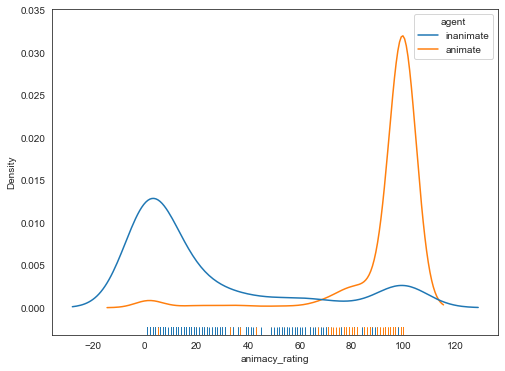

In [15]:
pilot.rating_dist(variable='animacy_rating', hue='agent', filename='pilot2_anim_dist.png')

Looks like the inanimate stimuli show a larger distribution in animacy ratings than the animate stim.
i.e. less variability in animacy ratings. Why could that be?

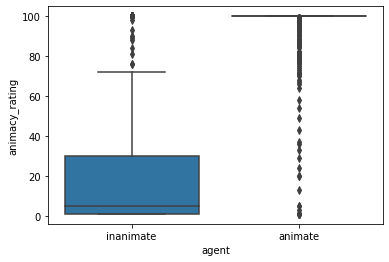

In [6]:
trial_dat = pilot.dat
sns.boxplot(x='agent', y='animacy_rating', data=trial_dat)

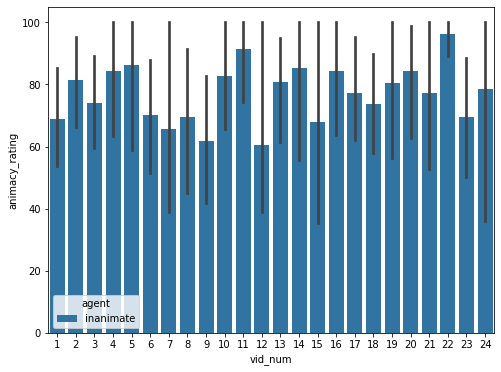

In [7]:
xx = trial_dat.loc[(trial_dat.agent == 'inanimate') & (trial_dat.animacy_rating > 30)]
f, a = plt.subplots(figsize=(8, 6))
#sns.kdeplot(data=xx, x='animacy_rating',  ax=a)
sns.pointplot(data=xx, x='vid_num', y='animacy_rating', hue='agent',  ax=a)

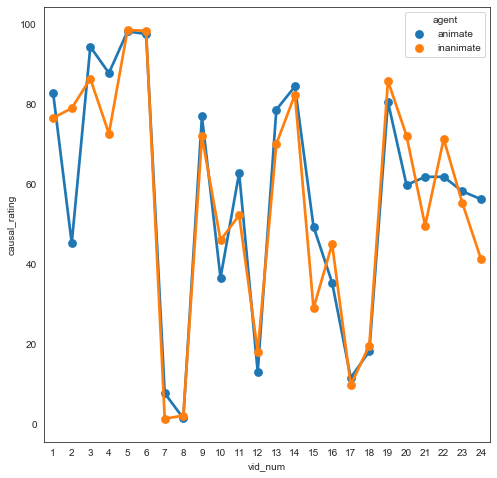

In [14]:
sns.set_style('white')

anim = pilot.dat.groupby(['vid_num', 'agent']).mean().causal_rating.reset_index()
f, a = plt.subplots(figsize=(8,8))
sns.catplot(data=anim, x='vid_num', y='causal_rating', hue='agent',kind='bar', ax=a)

In [9]:
pilot.dat['cond'] = 0
for i in range(len(pilot.dat)):
    if '_in_in' in pilot.dat.iloc[i]['stimulus']:
        pilot.dat.loc[i, 'cond'] = 1
    if '_in_out' in pilot.dat.iloc[i]['stimulus']:
        pilot.dat.loc[i, 'cond'] = 2
    if '_out_out' in pilot.dat.iloc[i]['stimulus']:
        pilot.dat.loc[i, 'cond'] = 3
    if '_out_in' in pilot.dat.iloc[i]['stimulus']:
        pilot.dat.loc[i, 'cond'] = 4

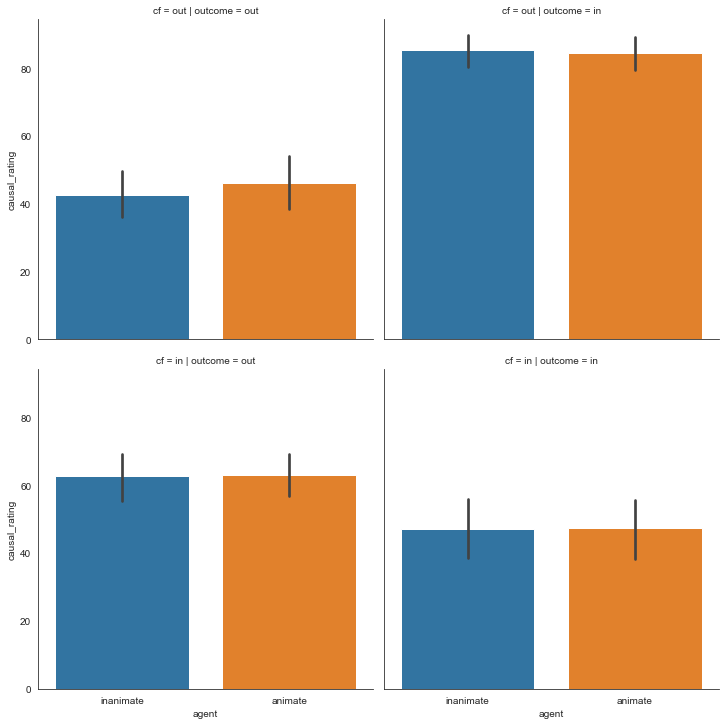

In [10]:
trial_dat = pilot.dat
trial_dat = trial_dat.loc[(trial_dat.vid_num != 8) & (trial_dat.vid_num != 7)]
sns.catplot(data=trial_dat, x='agent', y='causal_rating', kind='bar', col='outcome', row='cf' )


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


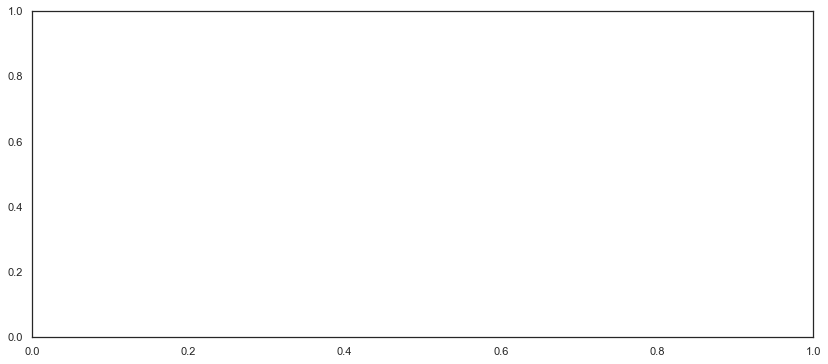

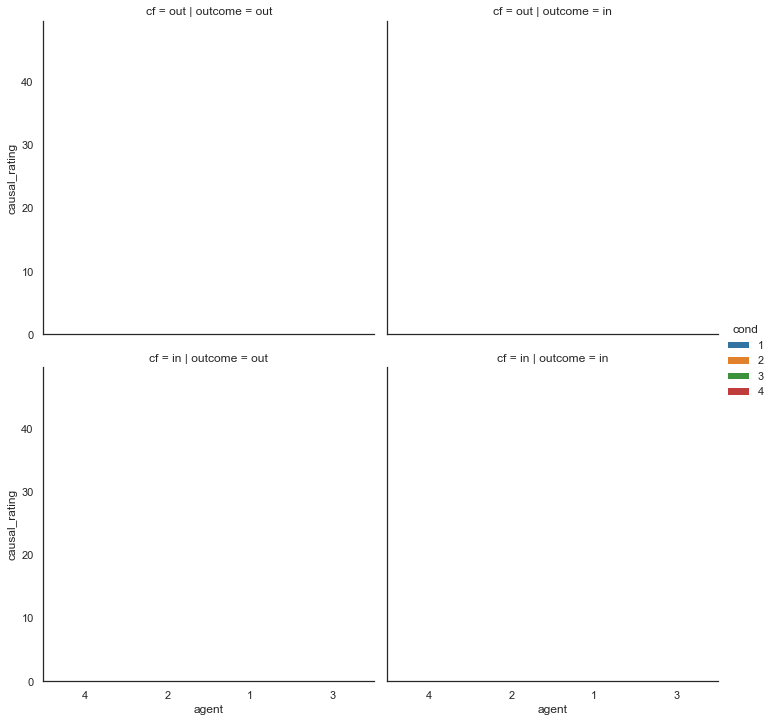

In [15]:
anim_diffs = pilot.dat.groupby(['cond', 'agent']).mean().causal_rating
anim_diffs = anim_diffs.diff(-1).xs('animate', level=1).abs().sort_values()
pilot.rating_means('agent', 'causal_rating', order=anim_diffs.index.tolist())

<Figure size 576x576 with 0 Axes>

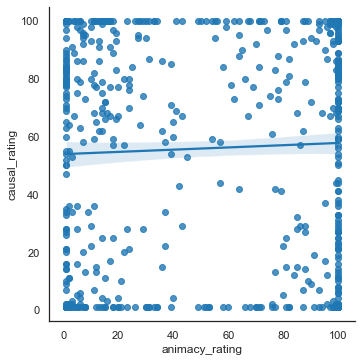

In [8]:

plt.figure(figsize=(8, 8))
sns.set_style('white')

sns.set_context(context='notebook')

g = sns.lmplot(x="animacy_rating", y="causal_rating",
                data=pilot.dat)


In [22]:
np.corrcoef(trial_dat.animacy_rating, trial_dat.causal_rating)

array([[1.        , 0.03949549],
       [0.03949549, 1.        ]])

In [23]:
pilot.show_variables()

['trial_num', 'jspsychID', 'stimulus', 'time_elapse', 'causal_rating', 'animacy_rating', 'cause_rt', 'anim_rt', 'trial_rt', 'subject_id', 'vid_num', 'outcome', 'cf', 'agent']


Maybe people think faster balls are more animate?

In [36]:
class VideoTrajectory:
    def __init__(self, path):
        self.path = path
        trajectory = pd.read_csv(path, names=['A', 'B'])
        # convert string to tuples
        for ball in ['A', 'B']:
            trajectory[ball] =  trajectory[ball].apply(literal_eval)
        # compute distance between balls per frame
        trajectory['distance']= [np.linalg.norm(np.asarray(trajectory.loc[t, 'A']) - np.asarray(trajectory.loc[t, 'B'])) for t in range(250)]
        self.trajectory = trajectory

    def plotBallDists(self):
        plt.plot(self.trajectory.distance)
        plt.xlabel("Frames")
        plt.ylabel("Distance between A and B")

    def getCollisionParams(self, verbose=False):
        if '9a' or '10a' in self.path:
            t_collision = self.trajectory['distance'].iloc[30:].idxmin()
        else:
            t_collision = self.trajectory['distance'].idxmin()  #becuase python starts w 0
        self.t_collision = t_collision
        dframes = 2
        p1 = self.trajectory.iloc[t_collision - dframes]['A']
        p2 = self.trajectory.iloc[t_collision]['A']
        self.p1 = {'frame_'+str((t_collision-dframes)): p1 }
        self.p2 = {'frame_'+str(t_collision): p2 }
        self.p0 = {'frame_'+str(t_collision - dframes - 5): self.trajectory.iloc[t_collision - dframes - 5]['A']}
        angle = math.degrees(math.atan(abs(p1[1] - p2[1])/abs(p1[0] - p2[0])))
        self.collisionAngle_A = angle
        self.compute_vel()
        if verbose:
            print('stimulus: '+self.path.split('.csv')[0])
            print(f'Collision frame number: {t_collision} \nCollision xy location: {self.trajectory.loc[t_collision, "A"]} \nCollision angle: {angle}')
            print(f'Ball A\'s instantaneous velocity at collision: {self.velocity[t_collision]}')

    def compute_vel(self):
        self.trajectory['A_fwd'] = 0 # frame-wise displacement
        self.trajectory.loc[range(1,len(self.trajectory)), 'A_fwd'] = [np.linalg.norm(np.array(self.trajectory.A[t-1])
                                                                                      - np.array(self.trajectory.A[t]))
                                                                       for t in range(1, len(self.trajectory))]
        self.velocity = np.gradient(self.trajectory.A_fwd.cumsum())

    def plotTrajectores(self, title):
        plt.scatter(*zip(*self.trajectory.B))
        plt.scatter(*zip(*self.trajectory.A))
        plt.title(title)

    def plotAvelocity(self):
        self.compute_vel()
        plt.plot(np.gradient(self.trajectory.A_fwd.cumsum()))

In [ ]:
vid = VideoTrajectory()
trial_dat.loc[trial_dat.]